DESCRIPTION: Systems of linear differential equations that model predator/prey population relationships.

# Lotka–Volterra Equations - Predator Prey

The [Lotka–Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) model predator/prey relations; for example, foxes and rabbit populations. Foxes eat rabbits. Rabbit population goes down. Less food for foxes. Fox population decreases because of less food. Rabbit population starts to go up because less foxes eating them. And it cycles. Below is the equation of (r)abbits and (f)oxes.

$$
\begin{align}
\frac{dr}{dt} &= \alpha r - \beta r f, \\
 \frac{df}{dt} &= \delta r f - \gamma f,
\end{align}
$$

## Goal
* Show how to use very basic programming techniques (loop, arithmetic, variables, print) to simulate and understand advanced college mathematical models, such as systems of linear differential equations.

## Overview

The Lotka–Volterra model (published in 1910) is a system of two linear differential equations that model how two populations of species change together as one population (the predators) eat the second population (the prey). Parameters are:
* Alpha (α) - how fast the rabbits grow.
* Beta (β) - how fast the rabbits die from being eaten.
* Gamma (γ) - how fast the foxes grow by eating rabbits.
* Delta (δ) - how fast the foxes die from starvation.

We assume there is infinite food for the rabbits.

## Key Points
* The underlying theory (in the wiki pages) uses math that you won't learn until college engineering classes.
* The code in this notebook, which simulates that math and plots it, uses very simple coding constructs: a loop, variable assignments, and simple math expressions that only use add, subtract, multiply, and divide.
* Therefore, you can use very simple programming techniques to simulate advanced mathematical equations.

## References
* [Another Online Simulator](https://sites.google.com/site/biologydarkow/ecology/predator-prey-simulation-of-the-lotka-volterra-model)
* [Lotka-Volterra model](https://visualize-it.github.io/lotka_volterra/simulation.html)


In [29]:
from sympy import symbols, solve, simplify, factor, roots
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# INITIAL CONDITIONS

# The number of rabbits
R = 100

# The number of foxes
F = 15

# Min and max populations
minR = 1e50
minF = 1e50
maxR = 0
maxF = 0

# Alpha, Beta, Gamma, Delta
a = 2     # rabbit birth rate
b = 0.04  # rabbits get eaten rate
d = 0.02  # fox growth rate based on food
g = 1.06  # fox death rate

# Time starts at zero
T = 0.0

# Time changes 1 day per step
dt = 1.0/365

# Create numpy arrays for the columns
t = []
r = []
f = []

print(f"""
Step    Years          R          F
---- -------- ---------- ----------
""")
for step in range(0, 20*365):
    if step < 100:
        print(f"{step:>4} {T:>8.2f} {R:>10.0f} {F:>10.0f}")
    
    t.append(T)
    r.append(R)
    f.append(F)
    
    dr = (a * R - b * R * F) * dt
    df = (d * R * F - g * F) * dt
    
    
    T = T + dt
    R = R + dr
    F = F + df
    
    # There will always be some rabbits and foxes
    #if R < 10: R = 10
    #if F < 10: F = 10
    
    if F < minF: minF = F
    if R < minR: minR = R
    if F > maxF: maxF = F
    if R > maxR: maxR = R
    
print(f"""
Steps = {step}
Min R = {minR:,.0f}
Min F = {minF:,.0f}
Max R = {maxR:,.0f}
Max F = {maxF:,.0f}
""")


Step    Years          R          F
---- -------- ---------- ----------

   0     0.00        100         15
   1     0.00        100         15
   2     0.01        101         15
   3     0.01        101         15
   4     0.01        102         15
   5     0.01        102         15
   6     0.02        102         15
   7     0.02        103         15
   8     0.02        103         15
   9     0.02        103         15
  10     0.03        104         15
  11     0.03        104         15
  12     0.03        105         15
  13     0.04        105         16
  14     0.04        105         16
  15     0.04        106         16
  16     0.04        106         16
  17     0.05        107         16
  18     0.05        107         16
  19     0.05        107         16
  20     0.05        108         16
  21     0.06        108         16
  22     0.06        109         16
  23     0.06        109         16
  24     0.07        109         16
  25     0.07        110  

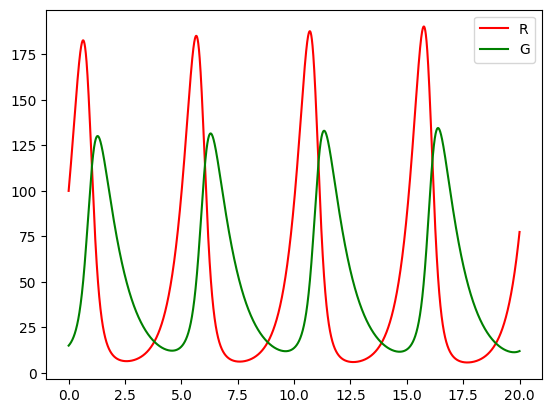

In [31]:
# Plot it
plt.plot(t, r, 'r', label="R")
plt.plot(t, f, 'g', label="G")
plt.legend()
plt.show()

# Summary of Graph
* The RED line is the number of rabbits.
* The BLUE line is the number of foxes.

Notice that the RED line lags the BLUE line by 90 degrees. This is very similar to the SIN and COS functions. Thus, the rabbit and fox population are like close to two points on a rotating circle (or wheel) where the rabbits has a bigger radius than the foxes, but the two points are 90 degress to each other.